# Sales prediciton:
    Predict sale of each particular product at every store

In [158]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# load in the data
big_mart_df = pd.read_csv('./data.csv')

In [157]:
# an item can be sold among all stores
big_mart_df[big_mart_df.Item_Identifier == 'FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [5]:
big_mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


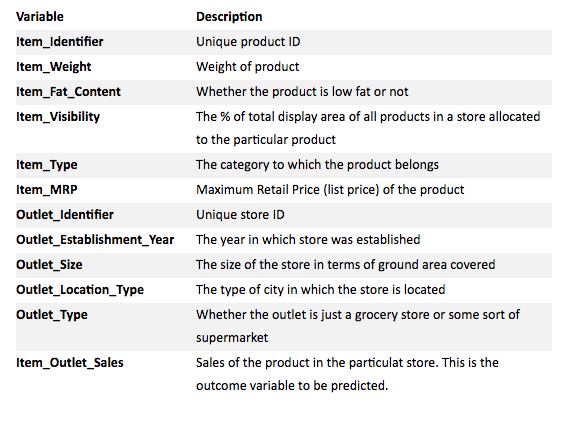

# Data Exploration and preparation:

In [6]:
# 1. Know the data types
big_mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
big_mart_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [147]:
# 2. univariate Analysis
from scipy.stats.mstats import mode
def get_descriptive_stats_continuous(input_df, column):
    """
    Function to print the descriptive statics of a give dataframe
    
    @Params:
        input_df: the input data frame which contains a column whose descriptive statics is to be calculated
        column: the name of the column whose descriptive statics is to be calculated.
        
    @Returns:
        desc_stat: a dictionary with the descriptive statistics
    """
    KEY_ORDER = ['count', 'min', 'max', 'mean', 'median','mode', 'std', 'variance', '25%', '50%', '75%', 'NaN_count', 'NaN_perc']
    desc_stat = {}
    desc_stat = input_df[column].describe().to_dict()
    desc_stat['variance'] = input_df[column].var()
    desc_stat['median'] = input_df[column].median()
    desc_stat['mode'] = mode(input_df[column])[0][0]
    desc_stat['NaN_count'] = input_df[column].isnull().sum() 
    desc_stat['NaN_perc'] = str(input_df[column].isnull().sum() / desc_stat['count']) + '%'
    print('---------------------DESCRIPTIVE STATICS '+column+' ---------------------')
    for key in KEY_ORDER:
        
        print(key +': '+str(desc_stat[key]) )
    print('-------------------------------------------------------------')
    return desc_stat

In [184]:
def get_histogram_box_plots(input_df, column):
    plt.subplots(1, 1, figsize=(8, 4))
    plt.hist(input_df[input_df[column].notnull()][column])
    plt.title(column +' Histogram')
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.subplots(1, 1, figsize=(8, 4))
    plt.boxplot(input_df[input_df[column].notnull()][column])
    plt.title(column +' Box Plot')
    plt.show()

In [185]:
def get_continuous_univariate_analysis(input_df, column):
    get_descriptive_stats_continuous(input_df, column)
    print('-------------------------------------------------------------')
    get_histogram_box_plots(input_df, column)

---------------------DESCRIPTIVE STATICS Item_Weight ---------------------
count: 7060.0
min: 4.555
max: 21.35
mean: 12.8576451841
median: 12.6
mode: 12.15
std: 4.64345649919
variance: 21.56168825983637
25%: 8.77375
50%: 12.6
75%: 16.85
NaN_count: 1463
NaN_perc: 0.207223796034%
-------------------------------------------------------------
-------------------------------------------------------------


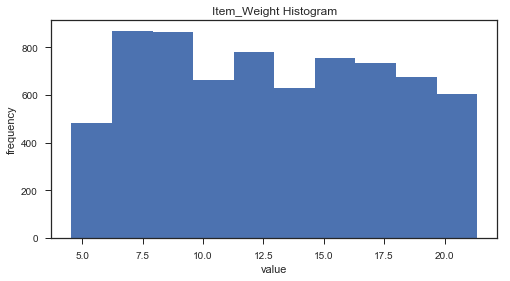

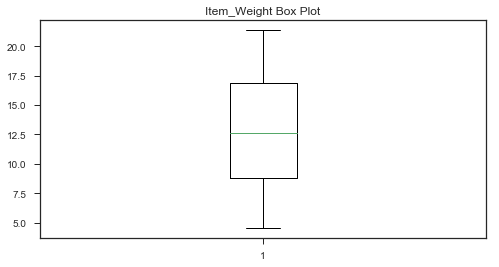

In [186]:
get_continuous_univariate_analysis(big_mart_df, 'Item_Weight')

In [142]:
# analysis for categorical values
def get_discrete_univariate_analysis(input_df, column):
    print('-------------'+column.upper()+'  DISTRIBUTION-----------------')
    rolled_up_df = input_df.groupby(column).size().reset_index(name='count').sort_values(['count'], ascending=False)
    count = rolled_up_df['count'].sum()
    rolled_up_df['perc'] = round((rolled_up_df['count'] / count) * 100, 2)
    rolled_up_df.index = range(1,len(rolled_up_df)+1)
    print(rolled_up_df)
    print('-------------------------------------------------------------')

In [143]:
get_discrete_univariate_analysis(big_mart_df, 'Item_Type')

-------------ITEM_TYPE  DISTRIBUTION-----------------
                Item_Type  count   perc
1   Fruits and Vegetables   1232  14.46
2             Snack Foods   1200  14.08
3               Household    910  10.68
4            Frozen Foods    856  10.04
5                   Dairy    682   8.00
6                  Canned    649   7.61
7            Baking Goods    648   7.60
8      Health and Hygiene    520   6.10
9             Soft Drinks    445   5.22
10                   Meat    425   4.99
11                 Breads    251   2.94
12            Hard Drinks    214   2.51
13                 Others    169   1.98
14          Starchy Foods    148   1.74
15              Breakfast    110   1.29
16                Seafood     64   0.75
-------------------------------------------------------------


# Do univariate analysis for all the columns:

In [144]:
big_mart_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [175]:
# discrete columns
# Item_Identifier is not here because it is a unique item identifier
# Outlet_Establishment_Year is in discrete columns list because it will only have a limited set of values, pandas
# recognizes it as a float
dis_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
          'Outlet_Type', 'Outlet_Establishment_Year']
# continuous columns
cont_col = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Univariate analysis for discrete colums:

In [153]:
for dis in dis_col:
    get_discrete_univariate_analysis(big_mart_df, dis)

-------------ITEM_FAT_CONTENT  DISTRIBUTION-----------------
  Item_Fat_Content  count   perc
1          Low Fat   5089  59.71
2          Regular   2889  33.90
3               LF    316   3.71
4              reg    117   1.37
5          low fat    112   1.31
-------------------------------------------------------------
-------------ITEM_TYPE  DISTRIBUTION-----------------
                Item_Type  count   perc
1   Fruits and Vegetables   1232  14.46
2             Snack Foods   1200  14.08
3               Household    910  10.68
4            Frozen Foods    856  10.04
5                   Dairy    682   8.00
6                  Canned    649   7.61
7            Baking Goods    648   7.60
8      Health and Hygiene    520   6.10
9             Soft Drinks    445   5.22
10                   Meat    425   4.99
11                 Breads    251   2.94
12            Hard Drinks    214   2.51
13                 Others    169   1.98
14          Starchy Foods    148   1.74
15              Breakfast

### notes:
    convert cases in Item_Fat_content, there is only 2 categories in this column Low Fat and Regular and some short hand notations of these.

# Univariate analysis for continuous colums:

---------------------DESCRIPTIVE STATICS Item_Weight ---------------------
count: 7060.0
min: 4.555
max: 21.35
mean: 12.8576451841
median: 12.6
mode: 12.15
std: 4.64345649919
variance: 21.56168825983637
25%: 8.77375
50%: 12.6
75%: 16.85
NaN_count: 1463
NaN_perc: 0.207223796034%
-------------------------------------------------------------
-------------------------------------------------------------


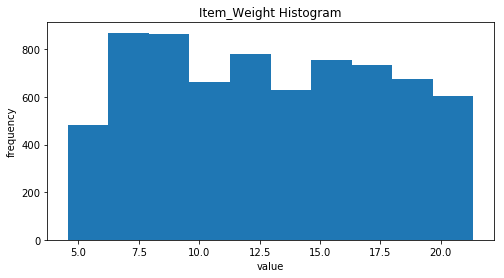

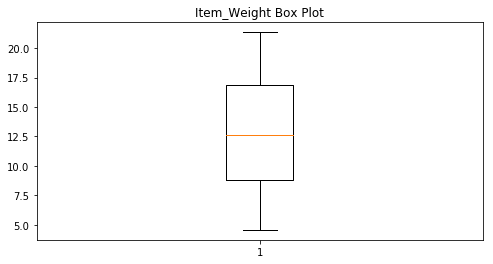

---------------------DESCRIPTIVE STATICS Item_Visibility ---------------------
count: 8523.0
min: 0.0
max: 0.328390948
mean: 0.066132028779
median: 0.05393093400000001
mode: 0.0
std: 0.0515978223211
variance: 0.0026623352682834376
25%: 0.0269894775
50%: 0.053930934
75%: 0.0945852925
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


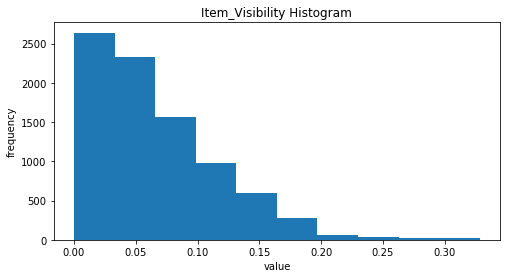

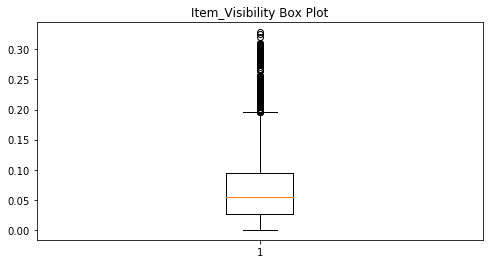

---------------------DESCRIPTIVE STATICS Item_MRP ---------------------
count: 8523.0
min: 31.29
max: 266.8884
mean: 140.992781978
median: 143.0128
mode: 172.0422
std: 62.2750665122
variance: 3878.1839090977373
25%: 93.8265
50%: 143.0128
75%: 185.6437
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


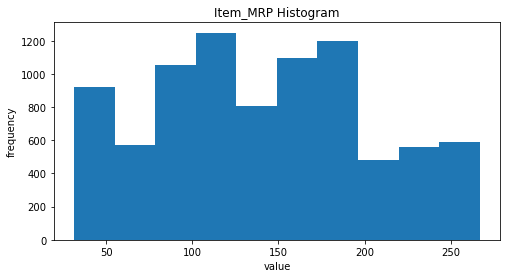

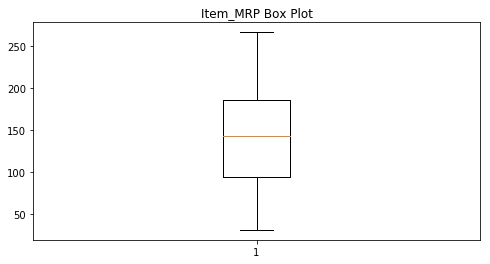

---------------------DESCRIPTIVE STATICS Item_Outlet_Sales ---------------------
count: 8523.0
min: 33.29
max: 13086.9648
mean: 2181.28891358
median: 1794.3310000000001
mode: 958.752
std: 1706.49961573
variance: 2912140.938499716
25%: 834.2474
50%: 1794.331
75%: 3101.2964
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


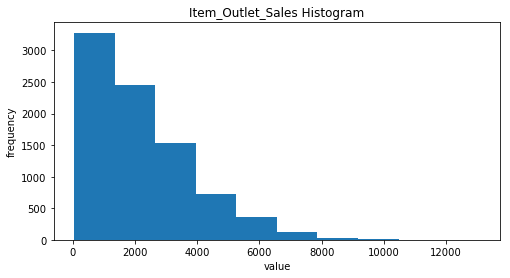

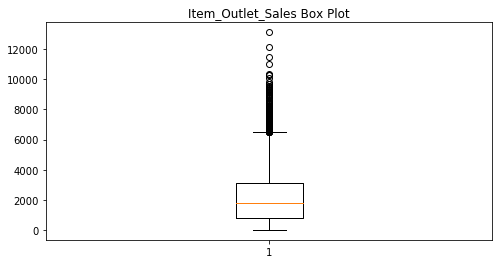

In [155]:
for cont in cont_col:
    get_continuous_univariate_analysis(big_mart_df, cont)

Note that the descriptive statistics are based on data across entire portfolio, not just one outlet.

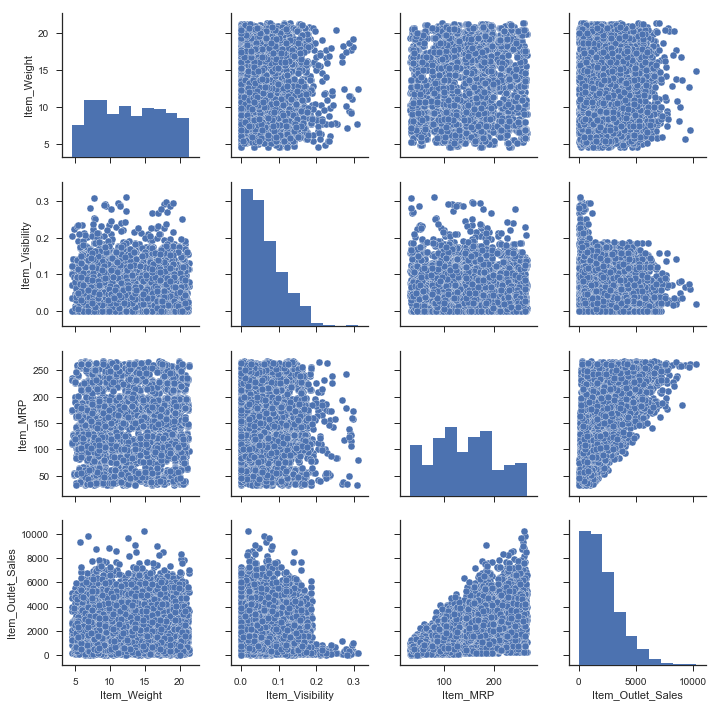

In [176]:
# Bivariate analysis
# we look at the scatter plots across the continuous variables
sns.set(style="ticks")
sns.pairplot(big_mart_df[cont_col].dropna())

In [180]:
# there is no clear visible correlation, we have to get the correlation coefficient between the columns
# correlation will be between -1 and 1
big_mart_df[cont_col].corr(method='pearson')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


We see 
1. a high correlation between MRP and sales
2. as item visibility increases the outlet sales goes down, which is interesting because the common assumption would be that the higher the visibility the higher the sales.

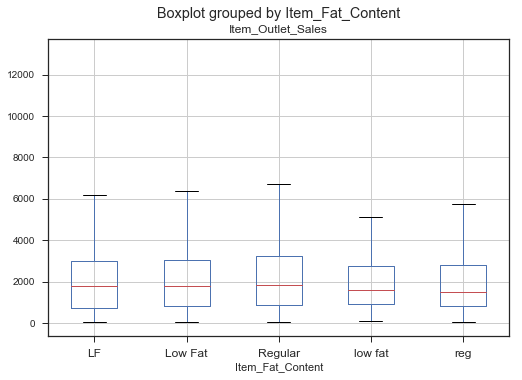

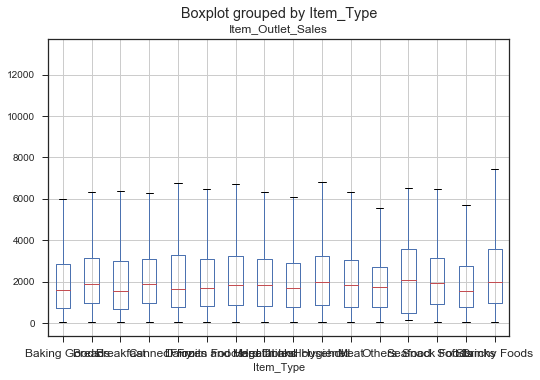

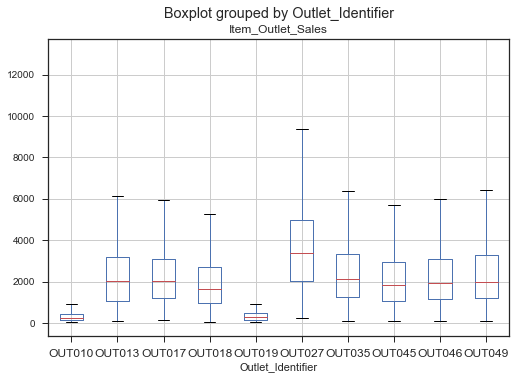

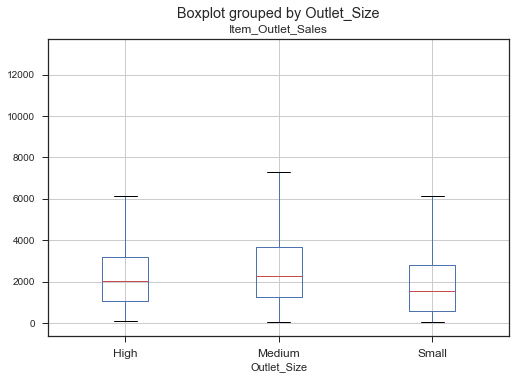

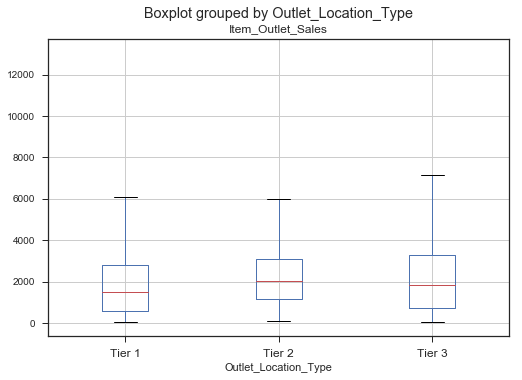

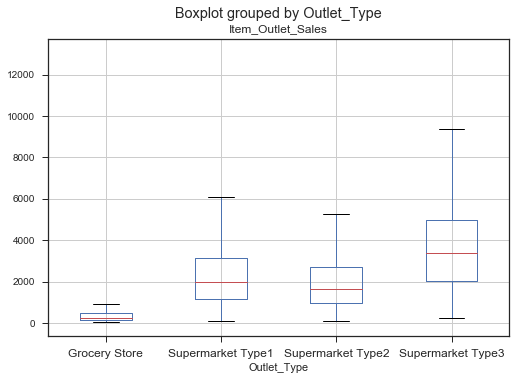

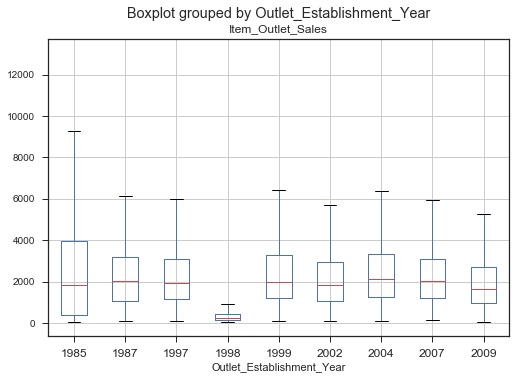

In [189]:
# we look at box plot of categorical variables against the continuous output variable
for dc in dis_col:
    big_mart_df.boxplot(column='Item_Outlet_Sales', by=dc)